
<div class="alert alert-block alert-info"><font size="5"><center><b><u> Sprint 8. Hypothesis Testing  
   </u></b></center></font>
\begin{align*}Marc\:Breysse\end{align*}

<span style=color:blue>*Aprèn a realitzar test d'hipòtesis amb Python.*</span>

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet

# <span style=color:darkblue>Nivell 1</span>

<u style=color:blue>Exercici 1:</u>

<span style=color:blue>Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.</span>

<span style=color:green><b> Dataset de Baseball 'mlbbat10.txt'</span>

<span style=color:green>
Description
Major League Baseball Player Hitting Statistics for 2010.

Usage
mlbbat10
    
Format
A data frame with 1199 observations on the following 19 variables.

name
Player name

team
Team abbreviation

position
Player position

game
Number of games

at_bat
Number of at bats

run
Number of runs

hit
Number of hits

double
Number of doubles

triple
Number of triples

home_run
Number of home runs

rbi
Number of runs batted in

total_base
Total bases, computed as 3HR + 23B + 1*2B + H

walk
Number of walks

strike_out
Number of strikeouts

stolen_base
Number of stolen bases

caught_stealing
Number of times caught stealing

obp
On base percentage

slg
Slugging percentage (total_base / at_bat)

bat_avg
Batting average
<b></span>

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import timeit
import random

In [3]:
Mlbbat10 = pd.read_csv('mlbbat10.txt', sep='\t', encoding='utf-8')

In [34]:
Mlbbat10.head()

,name,team,position,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


In [4]:
Mlbbat10.shape

(1199, 19)

<span style=color:green><b> Shapiro-Wilk Test</span>

<span style=color:green> H0: the sample has a Gaussian distribution.</span>  
<span style=color:green> H1: the sample does not have a Gaussian distribution.</span>

In [31]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(Mlbbat10.double)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.708, p=0.000
Probably not Gaussian


<span style=color:green> On the following histogram, it is clear that parameter 'double' does not follow a gaussian curve </span>

array([[<AxesSubplot:title={'center':'double'}>]], dtype=object)

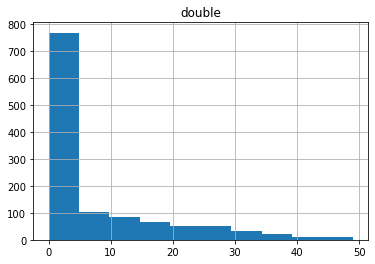

In [27]:
Mlbbat10.hist(column='double')

# <span style=color:darkblue>Nivell 2</span>

<u style=color:blue>Exercici 2:</u>

<span style=color:blue>Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5% .</span>

<span style=color:green>Correlation of all the attributes</span>

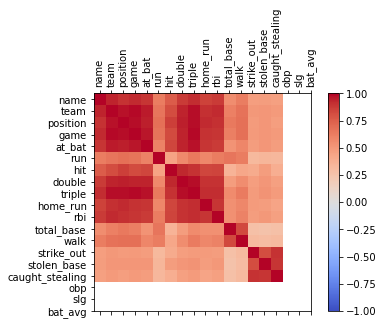

In [48]:
corr = Mlbbat10.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Mlbbat10.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Mlbbat10.columns)
ax.set_yticklabels(Mlbbat10.columns)
plt.show()

In [32]:
Mlbbat10.corr().round(3)

,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
game,1.000,0.938,0.904,0.924,0.891,0.626,0.765,0.881,0.914,0.859,0.879,0.562,0.629,0.474,0.484,0.464
at_bat,0.938,1.000,0.970,0.992,0.954,0.662,0.816,0.940,0.979,0.907,0.922,0.615,0.679,0.503,0.514,0.497
run,0.904,0.970,1.000,0.977,0.949,0.684,0.860,0.946,0.982,0.925,0.908,0.642,0.684,0.486,0.508,0.476
hit,0.924,0.992,0.977,1.000,0.964,0.666,0.822,0.945,0.987,0.901,0.898,0.618,0.682,0.498,0.513,0.498
double,0.891,0.954,0.949,0.964,1.000,0.608,0.837,0.942,0.971,0.891,0.883,0.531,0.593,0.482,0.512,0.478
triple,0.626,0.662,0.684,0.666,0.608,1.000,0.449,0.571,0.648,0.579,0.628,0.657,0.628,0.328,0.339,0.331
home_run,0.765,0.816,0.860,0.822,0.837,0.449,1.000,0.936,0.899,0.839,0.846,0.354,0.425,0.402,0.478,0.385
rbi,0.881,0.940,0.946,0.945,0.942,0.571,0.936,1.000,0.977,0.902,0.900,0.483,0.556,0.471,0.515,0.461
total_base,0.914,0.979,0.982,0.987,0.971,0.648,0.899,0.977,1.000,0.917,0.918,0.570,0.636,0.490,0.524,0.485
walk,0.859,0.907,0.925,0.901,0.891,0.579,0.839,0.902,0.917,1.000,0.891,0.547,0.585,0.487,0.482,0.443


<span style=color:green> Table shows some level of correlation betweem 'double' and 'triple'. Let's confirm with hypothesis testing</span>

<span style=color:green><b> Pearson’s Correlation test</span>

<span style=color:green> H0: the two samples are independent.</span>  
<span style=color:green> H1: there is a dependency between the samples</span>

In [33]:
from scipy.stats import pearsonr
stat, p = pearsonr(Mlbbat10.double, Mlbbat10.triple)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.608, p=0.000
Probably dependent


<span style=color:green> As p<0.5,it is confirmaed that the 2 variables have some dependency </span>

# <span style=color:darkblue>Nivell 3</span>

<u style=color:blue>Exercici 3:</u>

<span style=color:blue>Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.</span>


<span style=color:green> Let's check if means of 'obp (On base percentage)', 'slg (Slugging percentage)' and 'bat_avg (Batting average) are significantly different </span>

<span style=color:green><b> ANOVA:
Tests whether the means of two or more independent samples are significantly different. </span>

<span style=color:green> H0: the means of the samples are equal</span>  
<span style=color:green> H1: one or more of the means of the samples are unequal.</span>

In [35]:
from scipy.stats import f_oneway
stat, p = f_oneway(Mlbbat10.obp, Mlbbat10.slg, Mlbbat10.bat_avg)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=52.178, p=0.000
Probably different distributions
